In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages('tidyverse')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 702779 bytes (686 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [ ]:
%%R
data = read.csv('online_shoppers_intention.csv')
head(data)

  Administrative Administrative_Duration Informational Informational_Duration
1              0                       0             0                      0
2              0                       0             0                      0
3              0                       0             0                      0
4              0                       0             0                      0
5              0                       0             0                      0
6              0                       0             0                      0
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1              1                0.000000  0.20000000 0.2000000          0
2              2               64.000000  0.00000000 0.1000000          0
3              1                0.000000  0.20000000 0.2000000          0
4              2                2.666667  0.05000000 0.1400000          0
5             10              627.500000  0.02000000 0.0500000          0
6         

In [ ]:
%%R
dim(data)

[1] 12330    18


In [ ]:
%%R
na_count = sapply(data, function(y) sum(length(which(is.na(y)))))
na_count = data.frame(na_count)
na_count

                        na_count
Administrative                 0
Administrative_Duration        0
Informational                  0
Informational_Duration         0
ProductRelated                 0
ProductRelated_Duration        0
BounceRates                    0
ExitRates                      0
PageValues                     0
SpecialDay                     0
Month                          0
OperatingSystems               0
Browser                        0
Region                         0
TrafficType                    0
VisitorType                    0
Weekend                        0
Revenue                        0


In [ ]:
%%R
aggregate(data$VisitorType, by=list(data$VisitorType), FUN=length)

            Group.1     x
1       New_Visitor  1694
2             Other    85
3 Returning_Visitor 10551


In [ ]:
%%R
head(data)

  Administrative Administrative_Duration Informational Informational_Duration
1              0                       0             0                      0
2              0                       0             0                      0
3              0                       0             0                      0
4              0                       0             0                      0
5              0                       0             0                      0
6              0                       0             0                      0
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1              1                0.000000  0.20000000 0.2000000          0
2              2               64.000000  0.00000000 0.1000000          0
3              1                0.000000  0.20000000 0.2000000          0
4              2                2.666667  0.05000000 0.1400000          0
5             10              627.500000  0.02000000 0.0500000          0
6         

In [ ]:
%%R
data = data %>% distinct()
dim(data)

[1] 12205    18


In [ ]:
%%R
data$Weekend [data$Weekend == "TRUE"] = 1
data$Weekend [data$Weekend == "FALSE"] = 0
data$Weekend = as.integer(as.logical(data$Weekend))
data$Revenue [data$Revenue == "TRUE"] = 1
data$Revenue [data$Revenue == "FALSE"] = 0
data$Revenue = as.integer(as.logical(data$Revenue))
head(data)

  Administrative Administrative_Duration Informational Informational_Duration
1              0                       0             0                      0
2              0                       0             0                      0
3              0                       0             0                      0
4              0                       0             0                      0
5              0                       0             0                      0
6              0                       0             0                      0
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1              1                0.000000  0.20000000 0.2000000          0
2              2               64.000000  0.00000000 0.1000000          0
3              1                0.000000  0.20000000 0.2000000          0
4              2                2.666667  0.05000000 0.1400000          0
5             10              627.500000  0.02000000 0.0500000          0
6         

In [ ]:
%%R
data$VisitorType = as.factor(data$VisitorType)
data$Month = as.factor(data$Month)

In [ ]:
%%R
str(data)

'data.frame':	12205 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 0 2 3 ...
 $ ProductRelated_Duration: num  0 64 0 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "New_Visit

In [ ]:
%%R
summary(data)

 Administrative   Administrative_Duration Informational    
 Min.   : 0.000   Min.   :   0.00         Min.   : 0.0000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.000   Median :   9.00         Median : 0.0000  
 Mean   : 2.339   Mean   :  81.65         Mean   : 0.5087  
 3rd Qu.: 4.000   3rd Qu.:  94.70         3rd Qu.: 0.0000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.0000  
                                                           
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :   0.00        Min.   :  0.00   Min.   :    0.0        
 1st Qu.:   0.00        1st Qu.:  8.00   1st Qu.:  193.0        
 Median :   0.00        Median : 18.00   Median :  608.9        
 Mean   :  34.83        Mean   : 32.05   Mean   : 1207.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1477.2        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
                                                                


In [ ]:
## splitting training and test sets into 80 : 20 
%%R
set.seed(10)
train = sample(nrow(data), 0.8*nrow(data), replace = FALSE)
trainSet = data[train,]
testSet = data[-train,]
summary(trainSet)
summary(testSet)

 Administrative   Administrative_Duration Informational    
 Min.   : 0.000   Min.   :   0.00         Min.   : 0.0000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.000   Median :   9.00         Median : 0.0000  
 Mean   : 2.311   Mean   :  81.21         Mean   : 0.5297  
 3rd Qu.: 4.000   3rd Qu.:  98.80         3rd Qu.: 0.0000  
 Max.   :19.000   Max.   :2629.25         Max.   :24.0000  
                                                           
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :   0.0         Min.   :  0.00   Min.   :    0.0        
 1st Qu.:   0.0         1st Qu.:  7.00   1st Qu.:  181.3        
 Median :   0.0         Median : 18.00   Median :  618.2        
 Mean   :  33.8         Mean   : 32.39   Mean   : 1232.4        
 3rd Qu.:   0.0         3rd Qu.: 39.00   3rd Qu.: 1513.0        
 Max.   :2050.4         Max.   :705.00   Max.   :43171.2        
                                                                


In [ ]:
%%R
install.packages("randomForest")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/randomForest_4.6-14.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 80074 bytes (78 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[

## Random Forest Implementation

In [ ]:
%%R
library(randomForest)
rf1 = randomForest(VisitorType ~ ., data = trainSet, importance = TRUE)
rf1

R[write to console]: randomForest 4.6-14

R[write to console]: Type rfNews() to see new features/changes/bug fixes.

R[write to console]: 
Attaching package: ‘randomForest’


R[write to console]: The following object is masked from ‘package:dplyr’:

    combine


R[write to console]: The following object is masked from ‘package:ggplot2’:

    margin





Call:
 randomForest(formula = VisitorType ~ ., data = trainSet, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 11.93%
Confusion matrix:
                  New_Visitor Other Returning_Visitor class.error
New_Visitor               507     1               826  0.61994003
Other                       3    37                21  0.39344262
Returning_Visitor         313     1              8055  0.03751942


In [ ]:
%%R
pred_train = predict(rf1, trainSet, type = "class")
# Classification accuracy
table(pred_train, trainSet$VisitorType)  

                   
pred_train          New_Visitor Other Returning_Visitor
  New_Visitor              1319     0                 0
  Other                       0    52                 1
  Returning_Visitor          15     9              8368


In training set, we have 25 misclassified.

In [ ]:
%%R
pred_test = predict(rf1, testSet, type = "class")
# Classification accuracy
print(mean(pred_test == testSet$VisitorType)*100)
table(pred_test,testSet$VisitorType)

[1] 86.43998
                   
pred_test           New_Visitor Other Returning_Visitor
  New_Visitor               128     3                89
  Other                       0     9                 0
  Returning_Visitor         231     8              1973


In testset, we have 331 misclassified.

and our model accuracy is 86.43 %

In [ ]:
%%R
importance(rf1)

                        New_Visitor       Other Returning_Visitor
Administrative           15.5403282 -2.14017081         19.672879
Administrative_Duration  26.4646570 -1.21102924         28.303303
Informational             0.1816377  2.63817157         16.892032
Informational_Duration    2.0383326  6.30587928         11.786030
ProductRelated           36.4962164  8.46110853         34.738865
ProductRelated_Duration  23.0466287  1.41863171         30.423794
BounceRates              50.3511003 16.47216014         16.392713
ExitRates                67.7182021  7.74321856         21.781219
PageValues               20.1901313  2.04170823          9.727582
SpecialDay                8.6074836  2.60510047         -3.626275
Month                    14.8734476 15.77991504         14.250413
OperatingSystems          0.9219766 31.90770956         13.175324
Browser                   0.7558109 36.54237509         12.815444
Region                   -0.9314664 12.61966050          1.989307
TrafficTyp

These are the important variables.

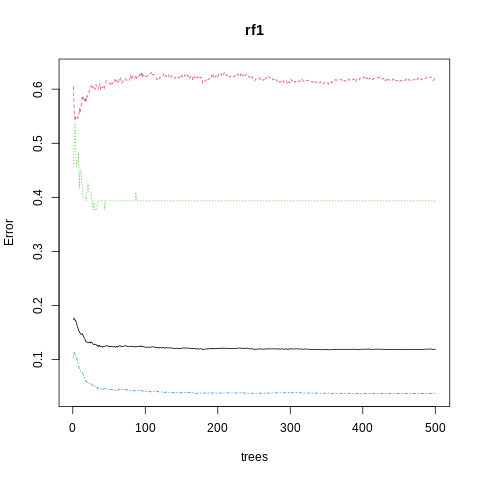

In [ ]:
%%R
plot(rf1)

## Decision Tree Implementation

In [ ]:
%%R
install.packages("rpart")
install.packages("caret")
install.packages("e1071")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/rpart_4.1-15.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 639286 bytes (624 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [ ]:
%%R
library(rpart)
library(caret)
library(e1071)

# Decision Tree 

dt = train(VisitorType ~ ., data = trainSet, method = "rpart")
dt_1 = predict(dt, data = trainSet)
print(table(dt_1, trainSet$VisitorType))
# Accuracy
mean(dt_1 == trainSet$VisitorType)*100

                   
dt_1                New_Visitor Other Returning_Visitor
  New_Visitor               414     2               230
  Other                       1    12                 0
  Returning_Visitor         919    47              8139
[1] 87.7202


For Decision Tree, there are 1199 misclassified values.

Our training model accuracy is 87.72

In [ ]:
# prediction on test set
%%R
pred_dt = predict(dt, newdata = testSet)
print(table(pred_dt, testSet$VisitorType))
print(mean(pred_dt == testSet$VisitorType)*100)

                   
pred_dt             New_Visitor Other Returning_Visitor
  New_Visitor                92     3                66
  Other                       0     3                 0
  Returning_Visitor         267    14              1996
[1] 85.66161


Our testset accuracy is 85.66 %.

In testset, there are 350 misclassified values.

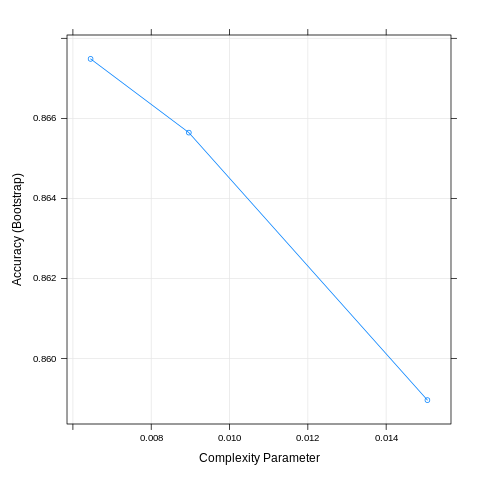

In [ ]:
%%R
plot(dt)

In [ ]:
%%R
hist(data$BounceRates)